<a href="https://colab.research.google.com/github/JUNYA-727/EfficientDet_dog/blob/main/EfficientDet_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#opencvで学習時にエラーが発生した時に使用した｡
!pip uninstall opencv-python-headless

In [22]:
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 1.6 MB/s 


In [ ]:
import os

In [ ]:
!curl -OL https://github.com/google/protobuf/releases/download/v3.2.0/protoc-3.2.0-linux-x86_64.zip
!unzip protoc-3.2.0-linux-x86_64.zip -d protoc3
!sudo mv protoc3/bin/* /usr/local/bin/
!sudo mv protoc3/include/* /usr/local/include/
!rm -rf protoc3 protoc-3.2.0-linux-x86_64.zip

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 68403, done.
remote: Total 68403 (delta 0), reused 0 (delta 0), pack-reused 68403
Receiving objects: 100% (68403/68403), 576.55 MiB | 14.27 MiB/s, done.
Resolving deltas: 100% (48072/48072), done.


In [ ]:
%cd /content/models/research

!/usr/local/bin/protoc object_detection/protos/*.proto --python_out=.

/content/models/research


In [ ]:
#ライブラリのインストール及びインストールの成否確認
!cp /content/models/research/object_detection/packages/tf2/setup.py .
!python -m pip install . --use-deprecated=legacy-resolver
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

In [ ]:
#アノテーションしたtfrecordをtrain､valに分ける
#またアノテーションをした際に作成されたtf_label_map.pbtxtは/content/に配置しておく
os.makedirs('/content/tf_data_train')
os.makedirs('/content/tf_data_val')

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz
!tar zxvf efficientdet_d1_coco17_tpu-32.tar.gz

In [19]:
#/content/models/research/efficientdet_d1_coco17_tpu-32/pipeline.configを書き換える
#保存先ディレクトリを作成する
os.makedirs('/content/efficientdet_model')

In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path="/content/models/research/efficientdet_d1_coco17_tpu-32/pipeline.config" \
    --model_dir="/content/efficientdet_model" \
    --num_train_steps=1000 \
    --alsologtostderr \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps=100

In [25]:
os.makedirs("/content/efficientdet_model/output")

In [ ]:
!python /content/models/research/object_detection/exporter_main_v2.py \
    --input_type=image_tensor \
    --pipeline_config_path="/content/models/research/efficientdet_d1_coco17_tpu-32/pipeline.config" \
    --trained_checkpoint_dir="/content/efficientdet_model" \
    --output_directory='/content/efficientdet_model/output'

In [28]:
import tensorflow as tf

model_path = '/content/efficientdet_model/output/saved_model'

DEFAULT_FUNCTION_KEY = 'serving_default'
loaded_model = tf.saved_model.load(model_path)
inference_func = loaded_model.signatures[DEFAULT_FUNCTION_KEY]

In [103]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
test=cv2.imread('/content/dog_001.jpg',cv2.IMREAD_UNCHANGED)
image_width, image_height = test.shape[1], test.shape[0]
test = test[:, :, [2, 1, 0]] 
print(test.shape)
test=np.expand_dims(test,axis=0)
print(test.shape)
tensor=tf.convert_to_tensor(test)
print(tensor[0][0])

(1582, 1036, 3)
(1, 1582, 1036, 3)
tf.Tensor(
[[218 208 181]
 [217 207 180]
 [217 207 180]
 ...
 [181 165 140]
 [182 167 144]
 [189 174 151]], shape=(1036, 3), dtype=uint8)


In [82]:
#推論
output=inference_func(tensor)
print(output['num_detections'][0])
print(output['detection_classes'][0])
print(output['detection_boxes'][0])
print(output['detection_scores'][0])

tf.Tensor(80.0, shape=(), dtype=float32)
tf.Tensor(
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.], shape=(100,), dtype=float32)
tf.Tensor(
[[0.41625986 0.25395304 0.7337401  0.73888683]
 [0.24156508 0.34988457 0.32093504 0.471118  ]
 [0.30107236 0.3374047  0.3364277  0.4454114 ]
 [0.31357235 0.33740473 0.34892768 0.44541147]
 [0.454065   0.36897758 0.53343505 0.49021104]
 [0.69375    0.98329353 0.74375    1.        ]
 [0.53312993 0.27972114 0.6918702  0.5221882 ]
 [0.         0.17758062 0.23374029 0.66251457]
 [0.6042894  0.2804063  0.74571073 0.71243274]
 [0.08124998 0.98329365 0.13124996 1.        ]
 [0.09374997 0.9642004  0.14374997 1.        ]
 [0.10624999 0.98329353 0.15624997 1.        ]
 [0.13125    0.98329353 0.18124998 1.

In [123]:
num_detections=int(output['num_detections'][0])
detection_classes=output['detection_classes'][0].numpy()
detection_scores=output['detection_scores'][0].numpy()
detection_boxes=output['detection_boxes'][0].numpy()

In [95]:
import copy
from google.colab.patches import cv2_imshow

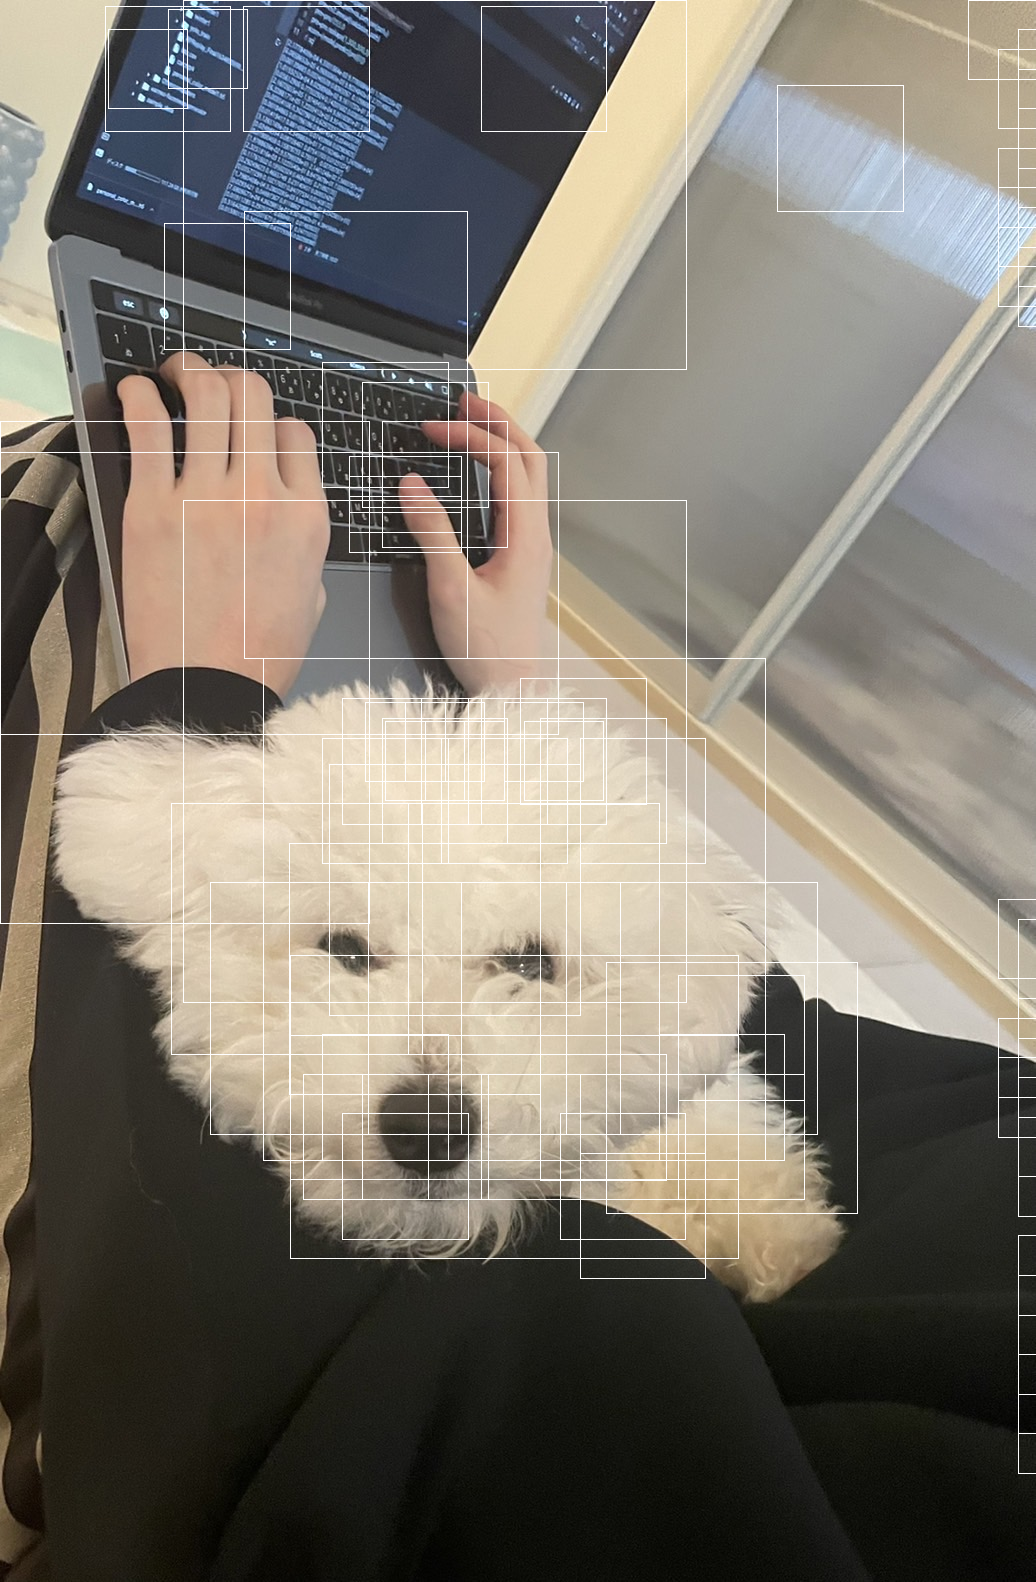

In [150]:
test=cv2.imread('/content/dog_001.jpg')
for i in range(num_detections):
  score=detection_scores[i]
  bbox=detection_boxes[i]
  x1, y1 = int(bbox[1] * image_width), int(bbox[0] * image_height)
  x2, y2 = int(bbox[3] * image_width), int(bbox[2] * image_height)
  cv2.rectangle(test, (x1, y1), (x2, y2), (255, 255, 255), 0)
cv2_imshow(test)